# Purpose:
The purpose of this notebook is to build a SLR model class with PyTorch.
* A linear toy dataset will be created
* A SLR model class will be created with fitting and plotting functions.
The plotting functions will plot the losses and true verses predicted values

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# A function to produce toy data

def toy_data(N=100):
    '''This function produces linear x and y values.
    INPUT:
    N: the number of observations.
    RETUNRS:
    x: x feature
    y: y target
    '''
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/2
    return x,y

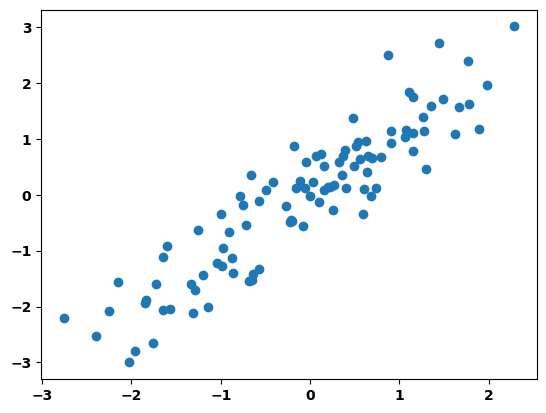

In [3]:
# creating toy data and verifying the shape
x,y = toy_data()
x.shape,y.shape

plt.scatter(x,y)

In [4]:
class ANN_Reg():
    
    '''This class will fit a SLR model and then plot the losses 
    and plot the true verses predicted values.
    
    PARAMETERS:
    lr: learning rate.  Default is 0.01
    epochs: number of training iterations for backprop. Default 1000.
    
    EXAMPLE:
    regressor = ANN_Reg(lr=0.15, epochs=800)
    '''
    
    def __init__(self,lr=0.01,epochs=2000):
        self.lr = lr
        self.epochs = epochs
    
    

    def fit(self,x,y):

        '''This function performs SLR.
        INPUTS:
        x: single feature
        y: single target variable
        
        RETURNS: values will be in standard or numpy dtype
        y_preds: model triaing predictions
        losses: array of losses per each epoch
        final loss: the last loss value
        
        Example:
        regressor = ANN_Reg()
        y_preds, losses, final_loss = regressor.fit(x,y)
        
        '''
        self.x = x
        self.y = y
        
        ANN_reg = nn.Sequential(
            nn.Linear(1,1),
            nn.ReLU(),
            nn.Linear(1,1)
        )

        loss_fn = nn.MSELoss()
        opti = torch.optim.SGD(ANN_reg.parameters(), self.lr)
        self.losses = torch.zeros(self.epochs)

        for epoch in range(self.epochs):
            pred = ANN_reg(self.x)
            loss = loss_fn(pred,self.y)
            self.losses[epoch] = loss

            opti.zero_grad()
            loss.backward()
            opti.step()

        self.final_loss = self.losses[-1].item()
        self.losses = self.losses.detach().numpy()
        self.y_preds = ANN_reg(x).detach().numpy()

        return self.y_preds, self.losses, self.final_loss
    
    def plot_ann(self):
        '''After fitting the model, 
        this will return a plot of the true verse predicted y values.
        
        RETURNS: A plot of the true and predicted values.
        
        EXAMPLE:
        regressor.plot_ann()
        '''
        
        plt.scatter(self.x, self.y, label='True')
        plt.scatter(self.x, self.y_preds, label='predictions')
        plt.grid()
        plt.legend()
        
    def plot_losses(self):
        '''After fitting the model, 
        this will return a plot of the
        losses per epoch.
        
        RETURNS: A plot of the losses.
        
        EXAMPLE:
        regressor.plot_losses()'''
        
        plt.plot(range(self.losses.size),self.losses, label='Losses')
        plt.axhline(self.final_loss, c='r', ls=':', label=f'Final Loss: {self.final_loss:.3f}')
        plt.grid()
        plt.title('ANN Model Losses')
        plt.legend()
    

In [5]:
# fitting the model

regressor = ANN_Reg(lr=0.1, epochs=500)
y_preds, losses, final_loss = regressor.fit(x,y)

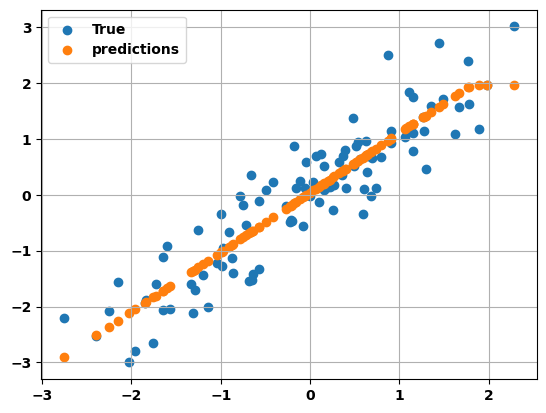

In [6]:
# plotting the predictions verse true target values

regressor.plot_ann()

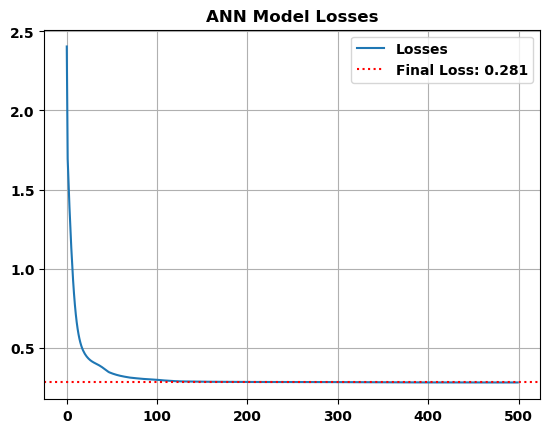

In [7]:
# plotting the losses

regressor.plot_losses()